[Configuring MongoDB Atlas with BigQuery Dataflow Templates](https://www.cloudskillsboost.google/focuses/57191?catalog_rank=%7B%22rank%22%3A12%2C%22num_filters%22%3A0%2C%22has_search%22%3Atrue%7D&parent=catalog&search_id=23522696)

In [ ]:
H WWW: hchhcYTR&^$$$

H Base: rtxQKcnhKXcS573n

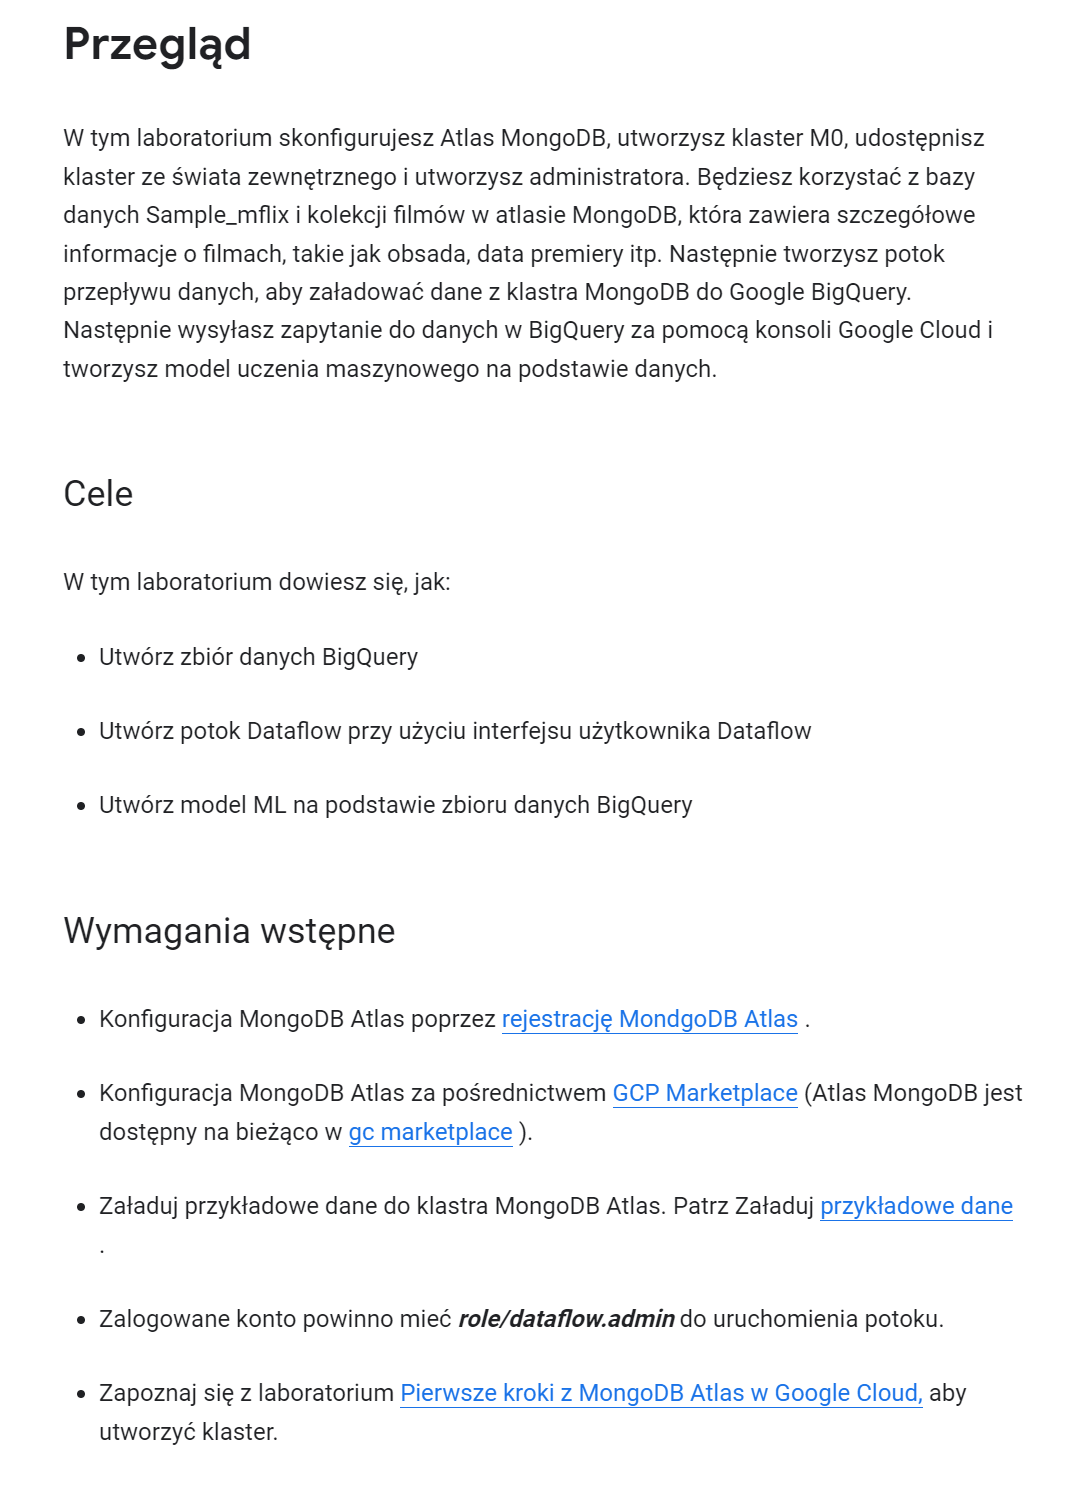

In [ ]:
# https://www.mongodb.com/cloud/atlas/register
# https://console.cloud.google.com/marketplace/product/mongodb/mdb-atlas-self-service
# https://www.mongodb.com/docs/charts/tutorial/order-data/prerequisites-setup/
# https://www.cloudskillsboost.google/focuses/50353?parent=catalog

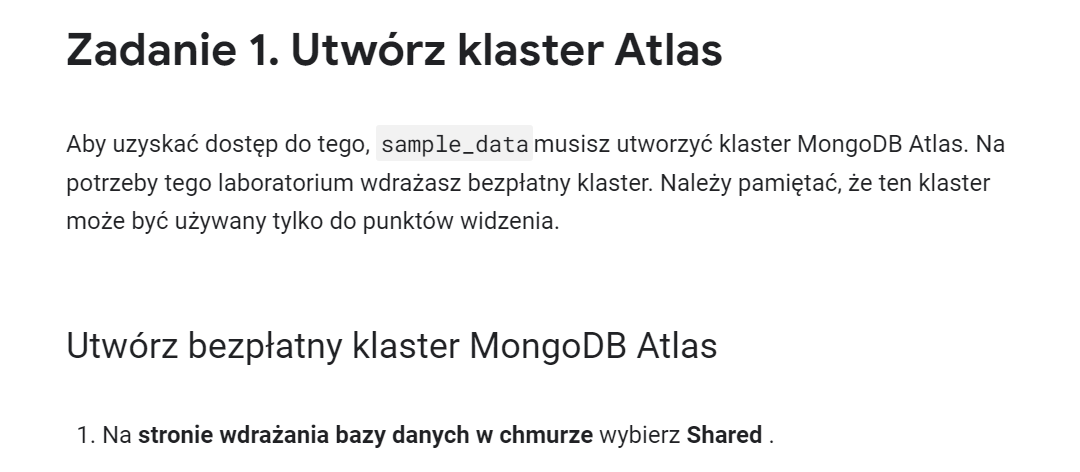

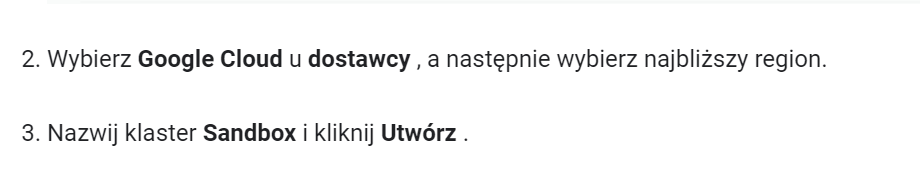

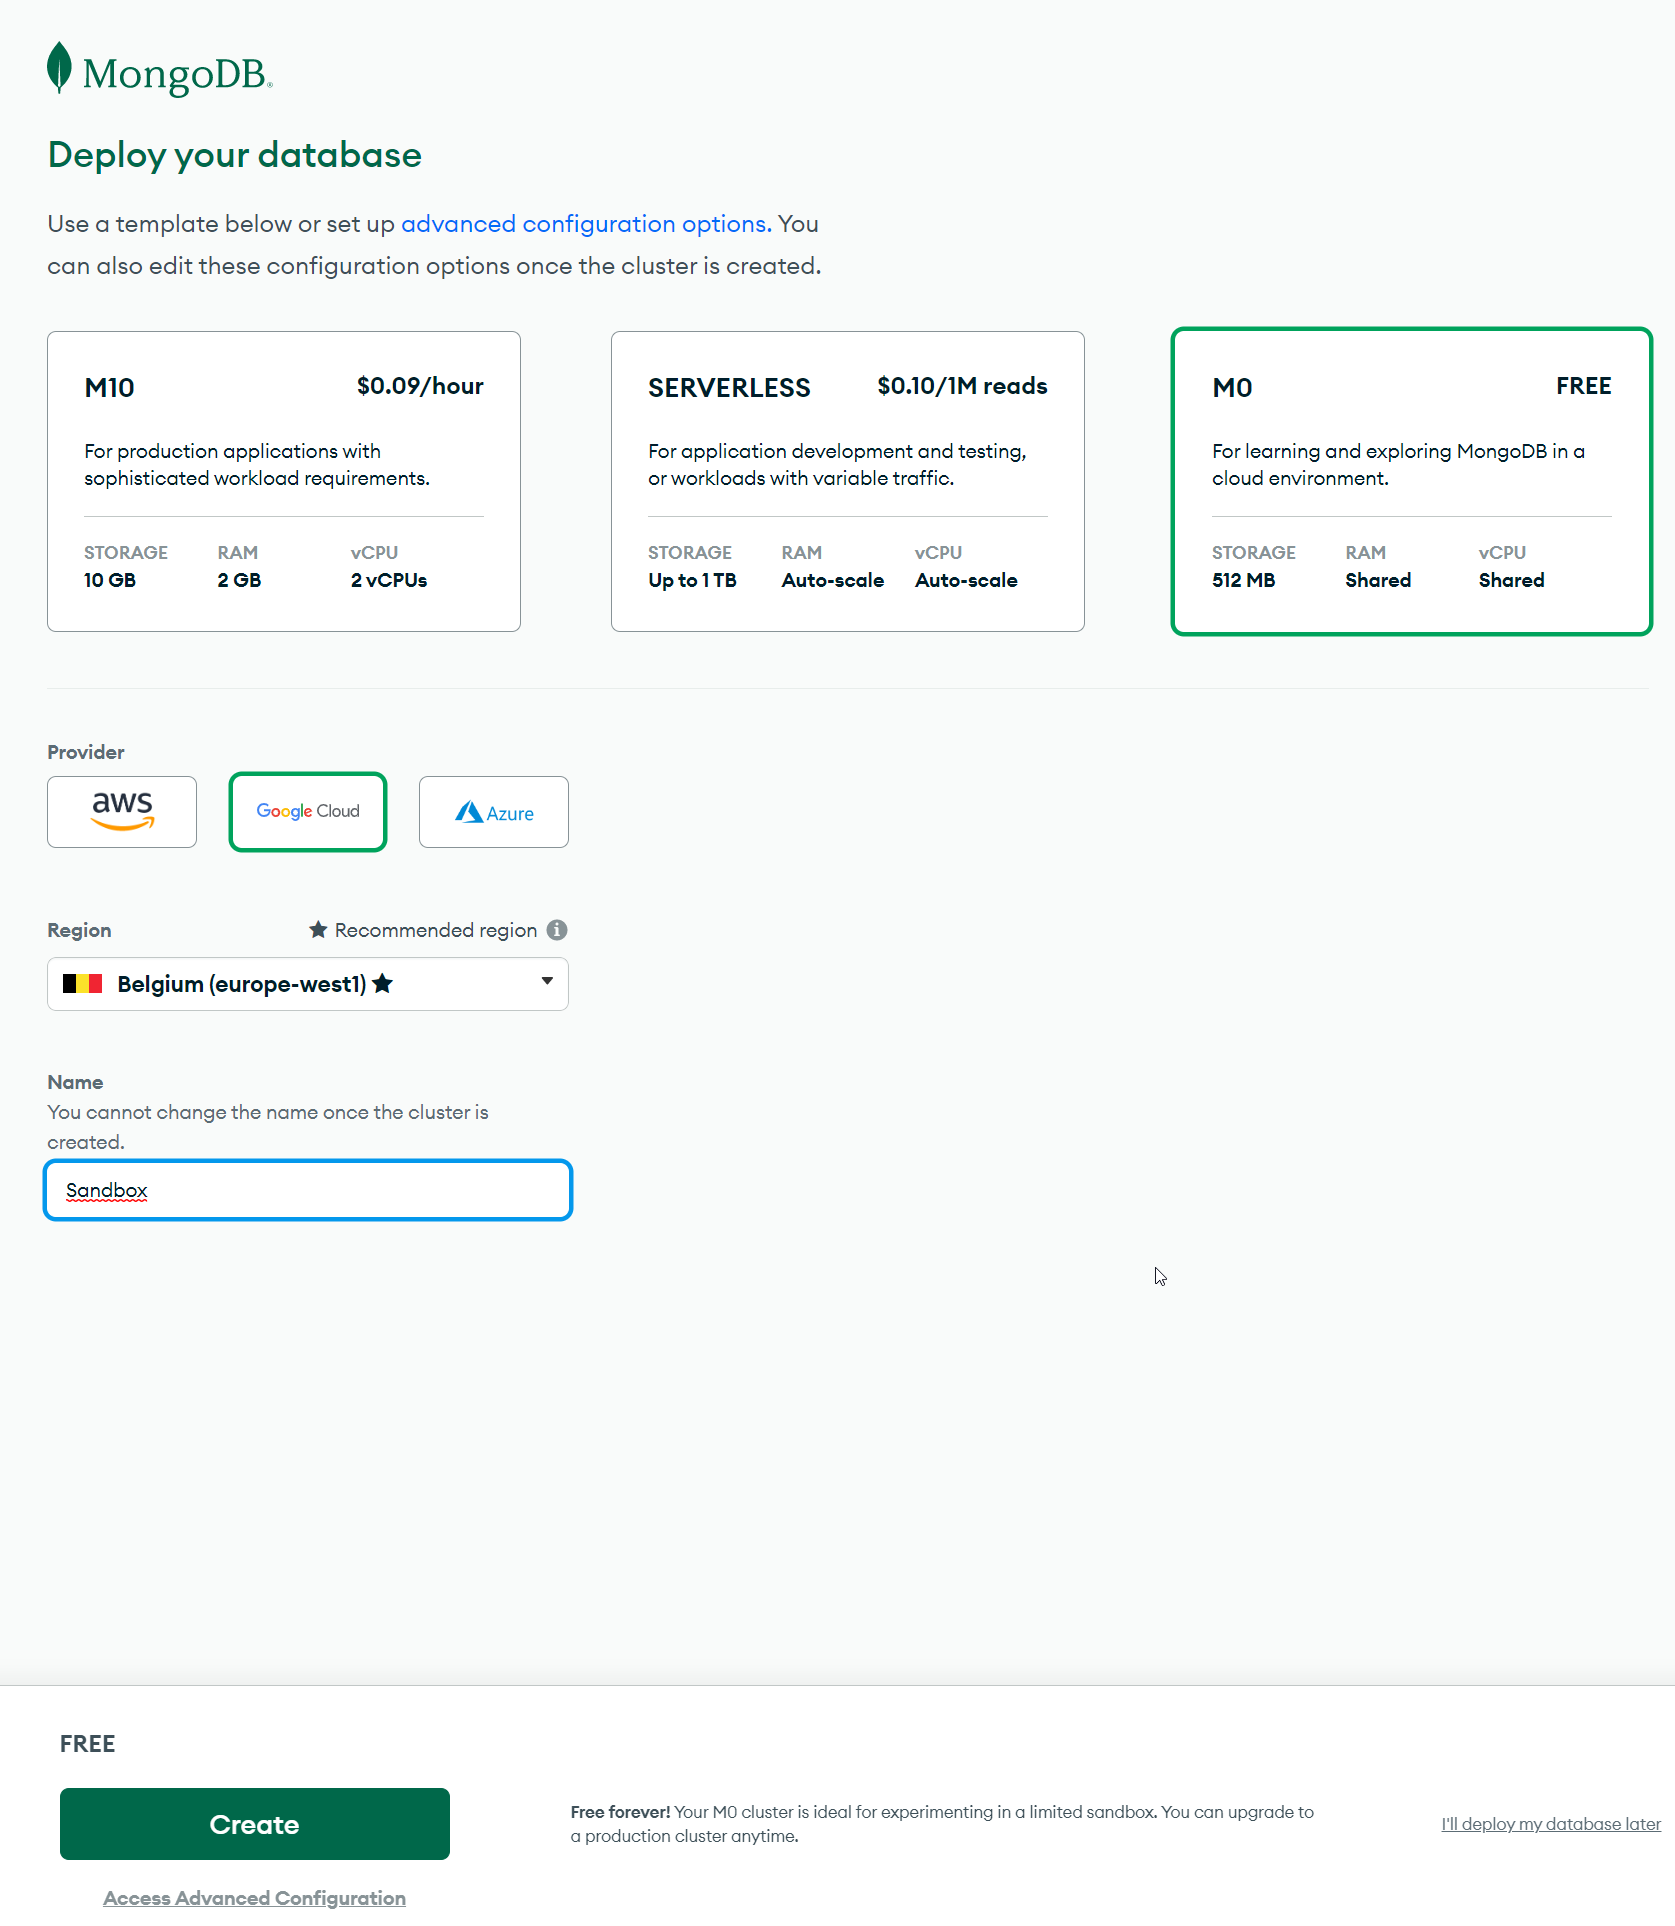

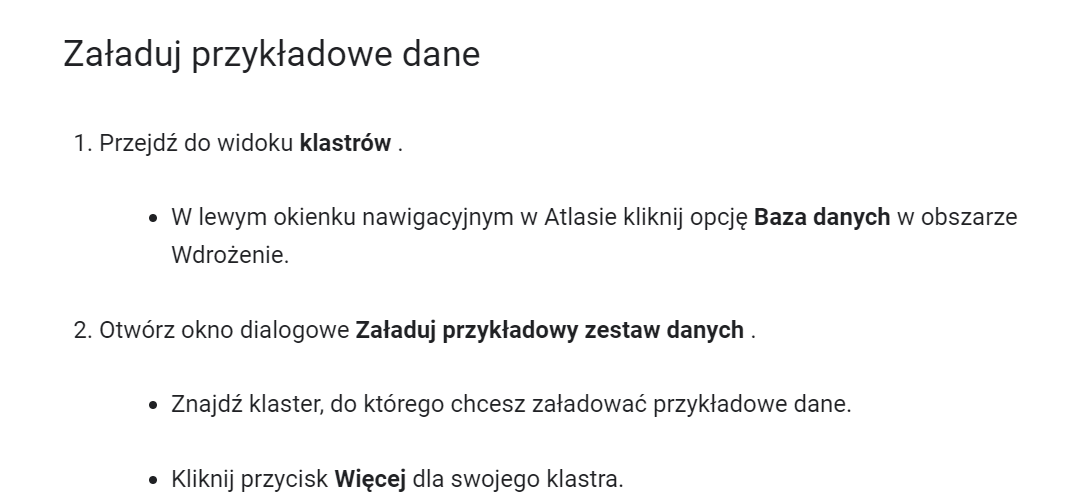

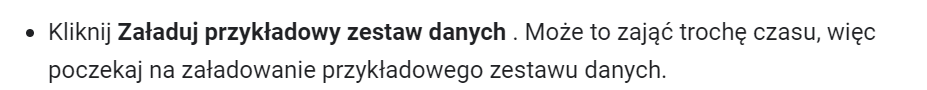

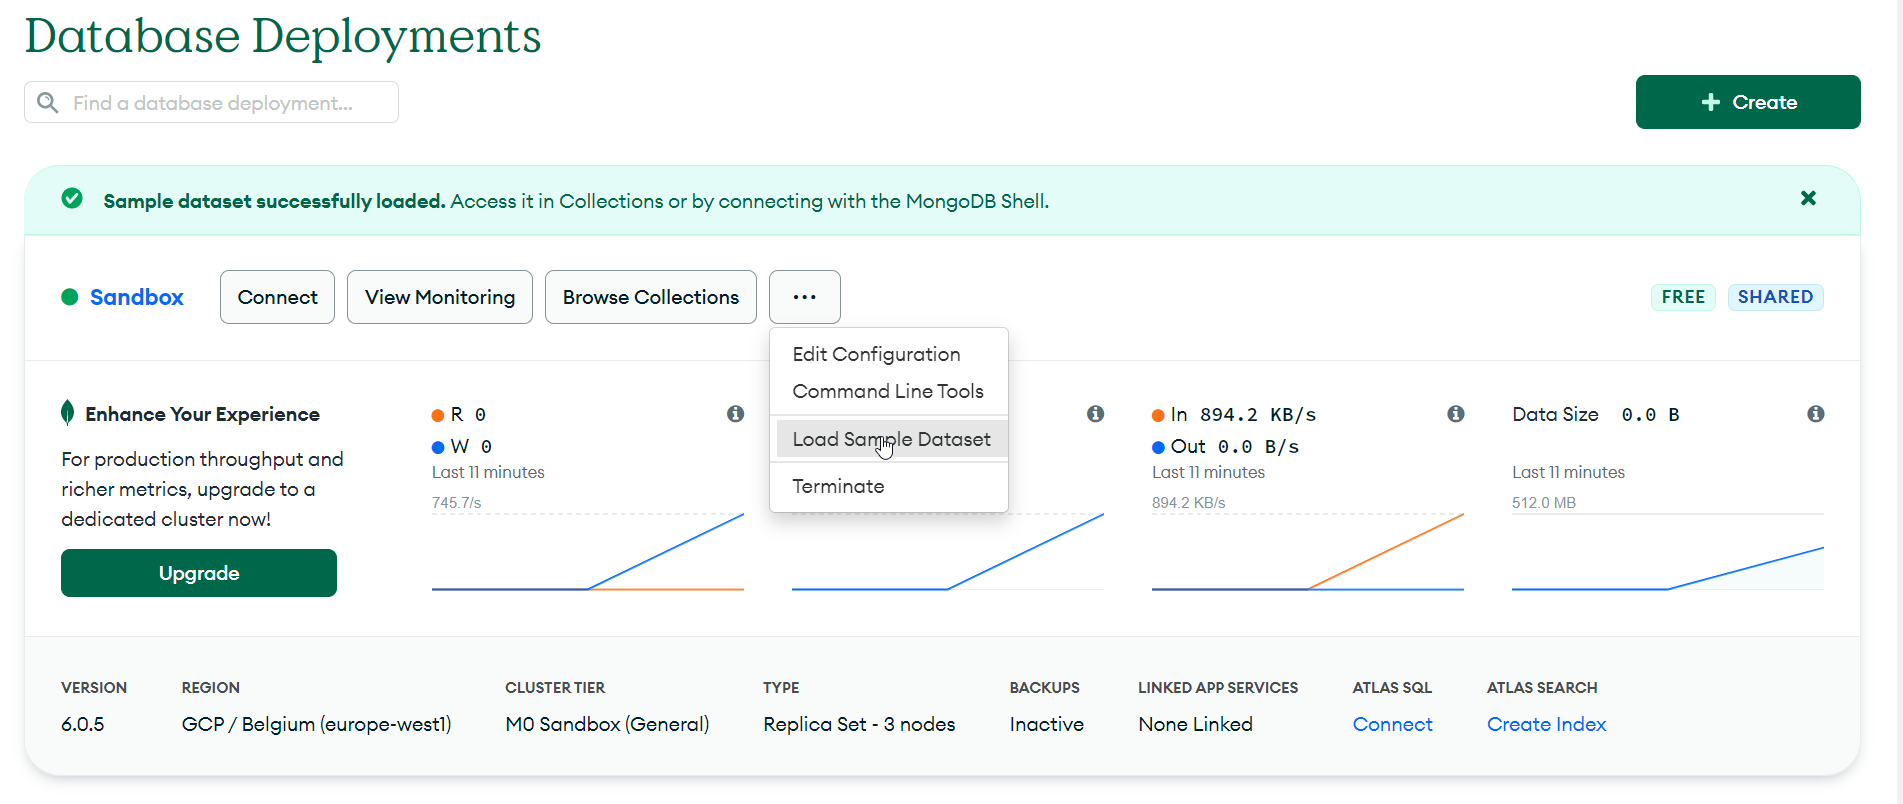

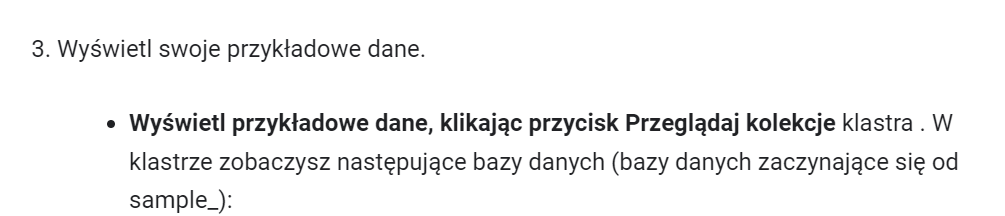

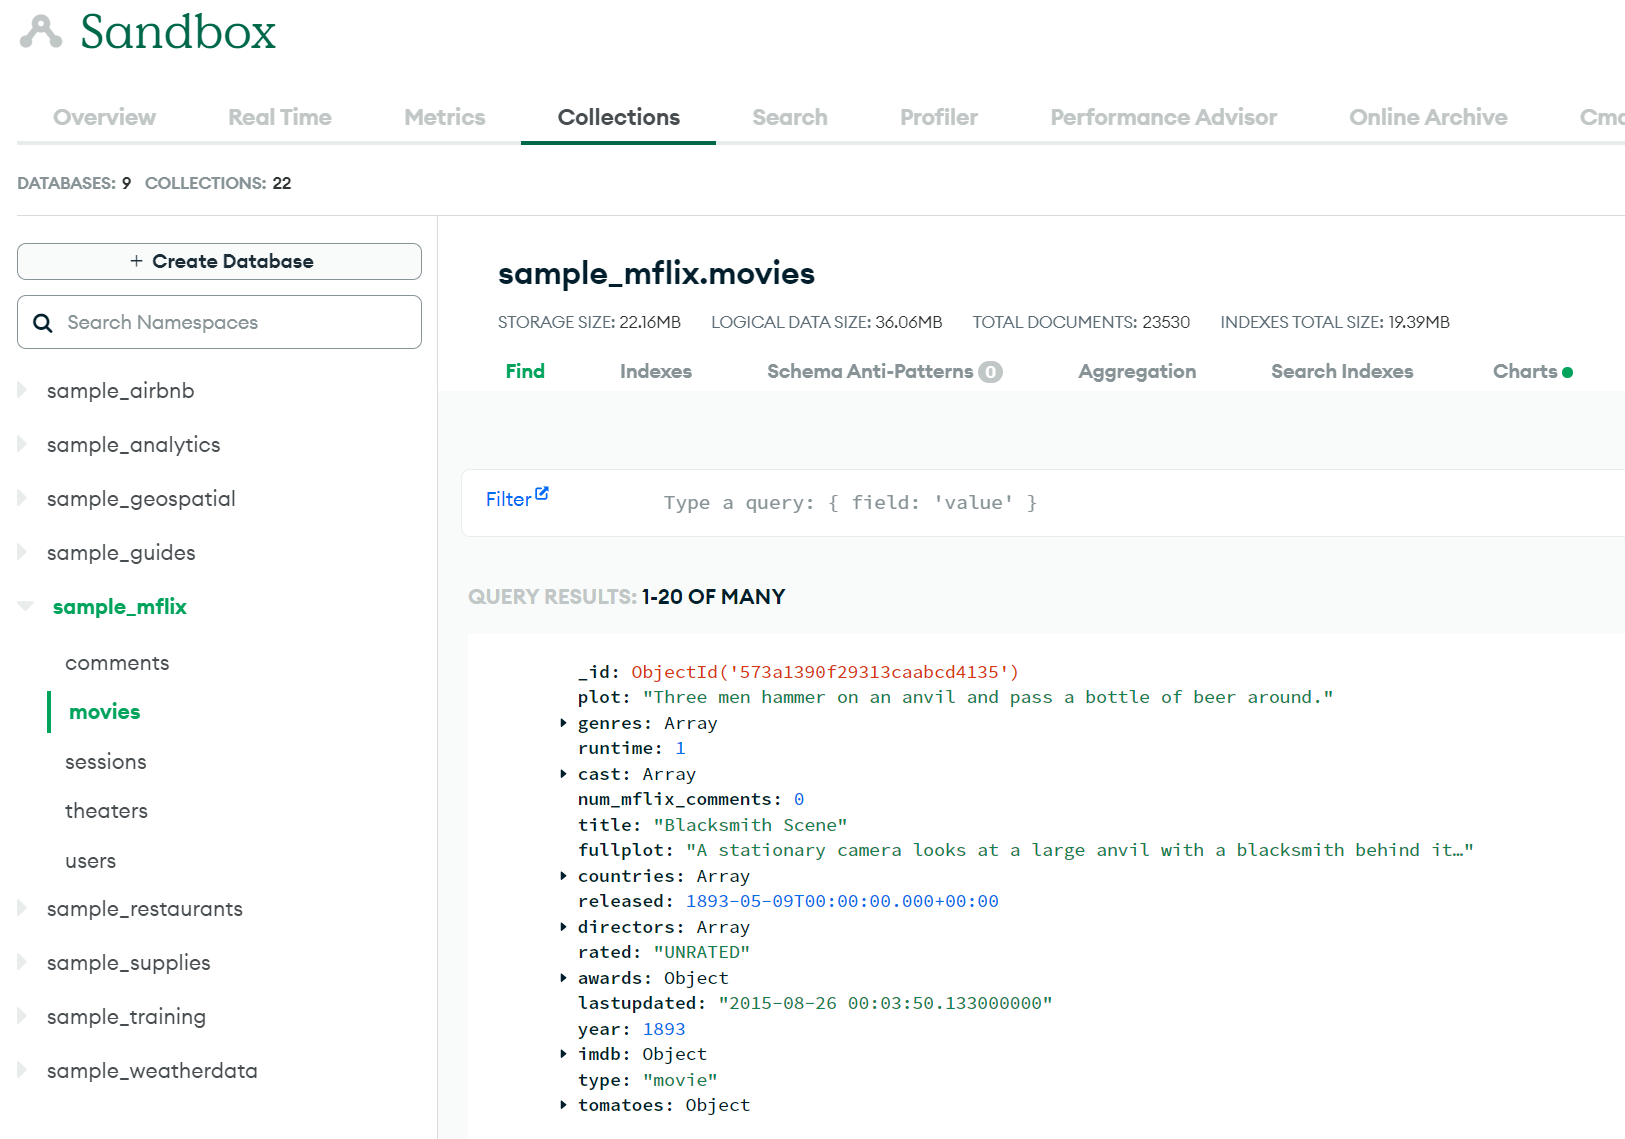

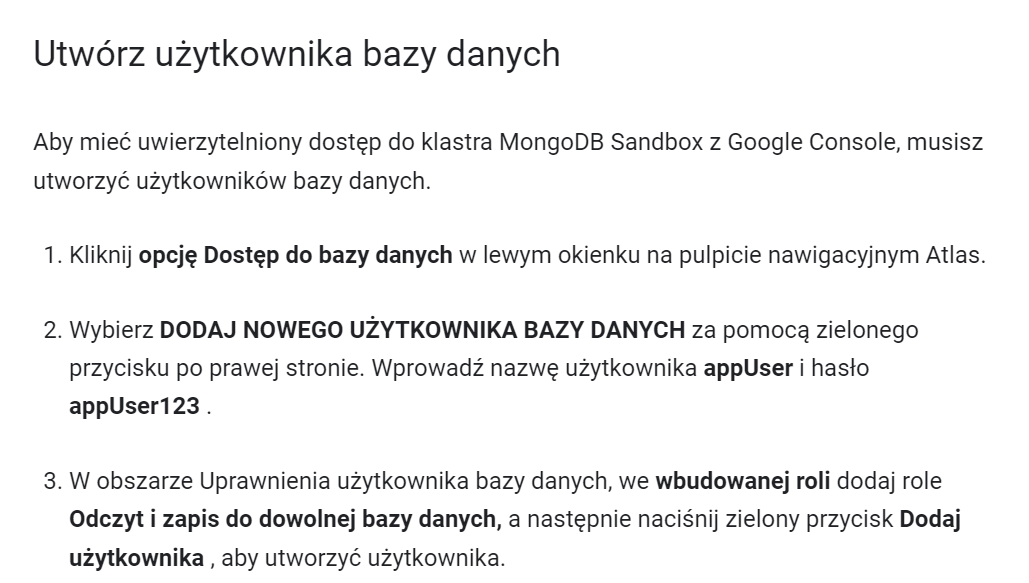

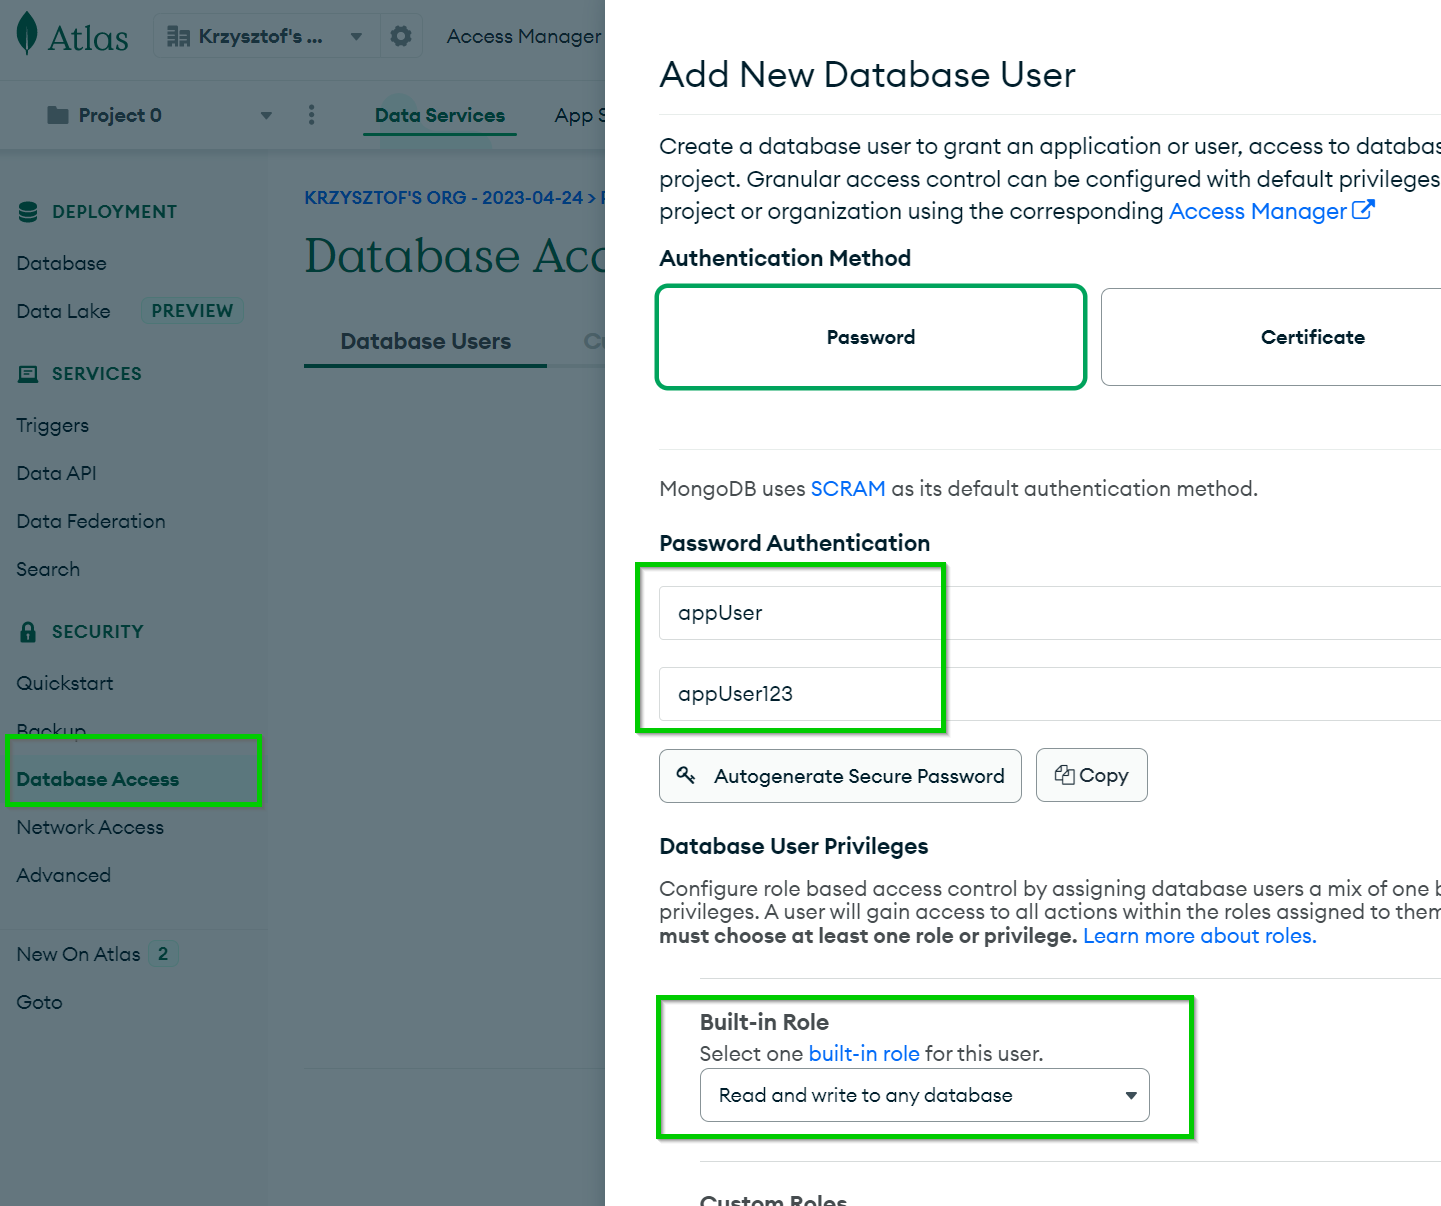

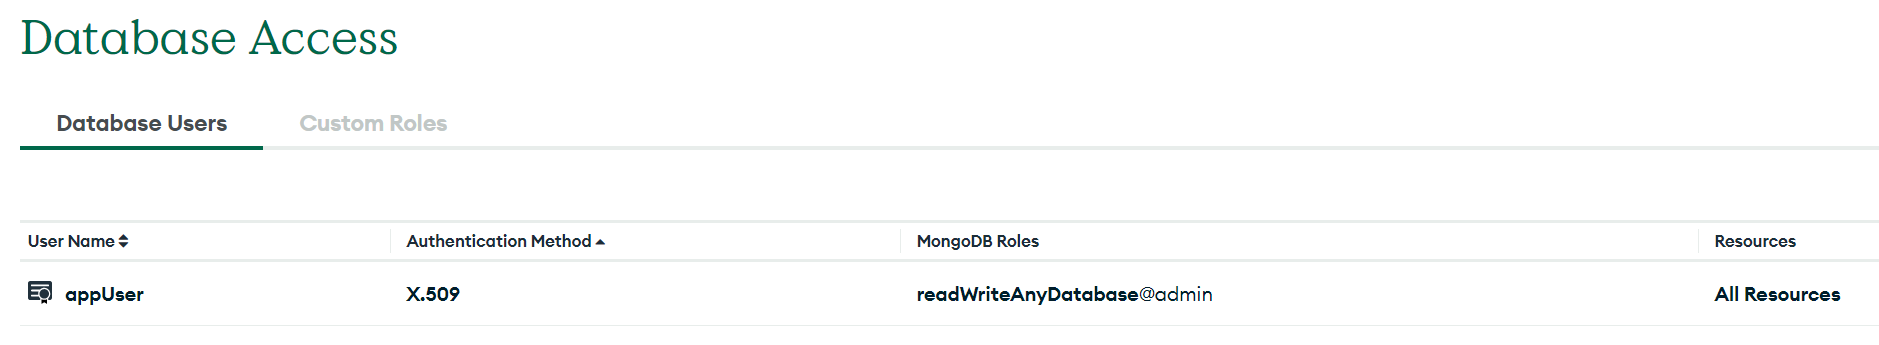

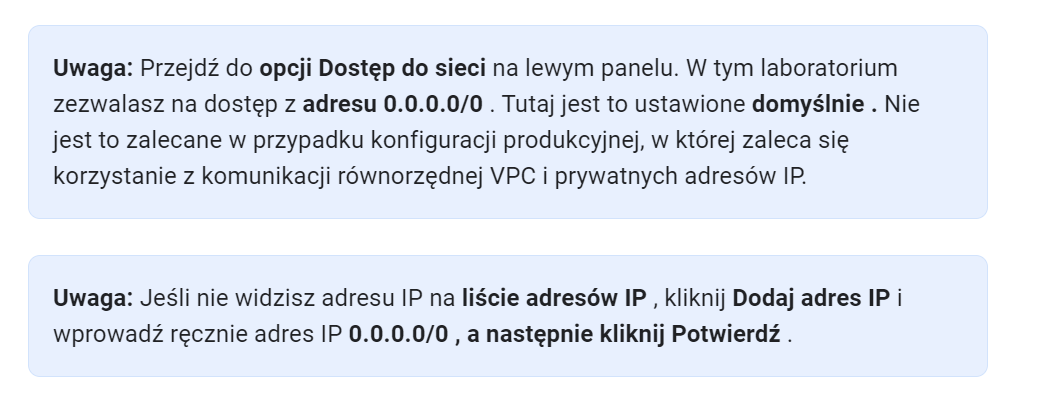

In [ ]:
# 0.0.0.0/0

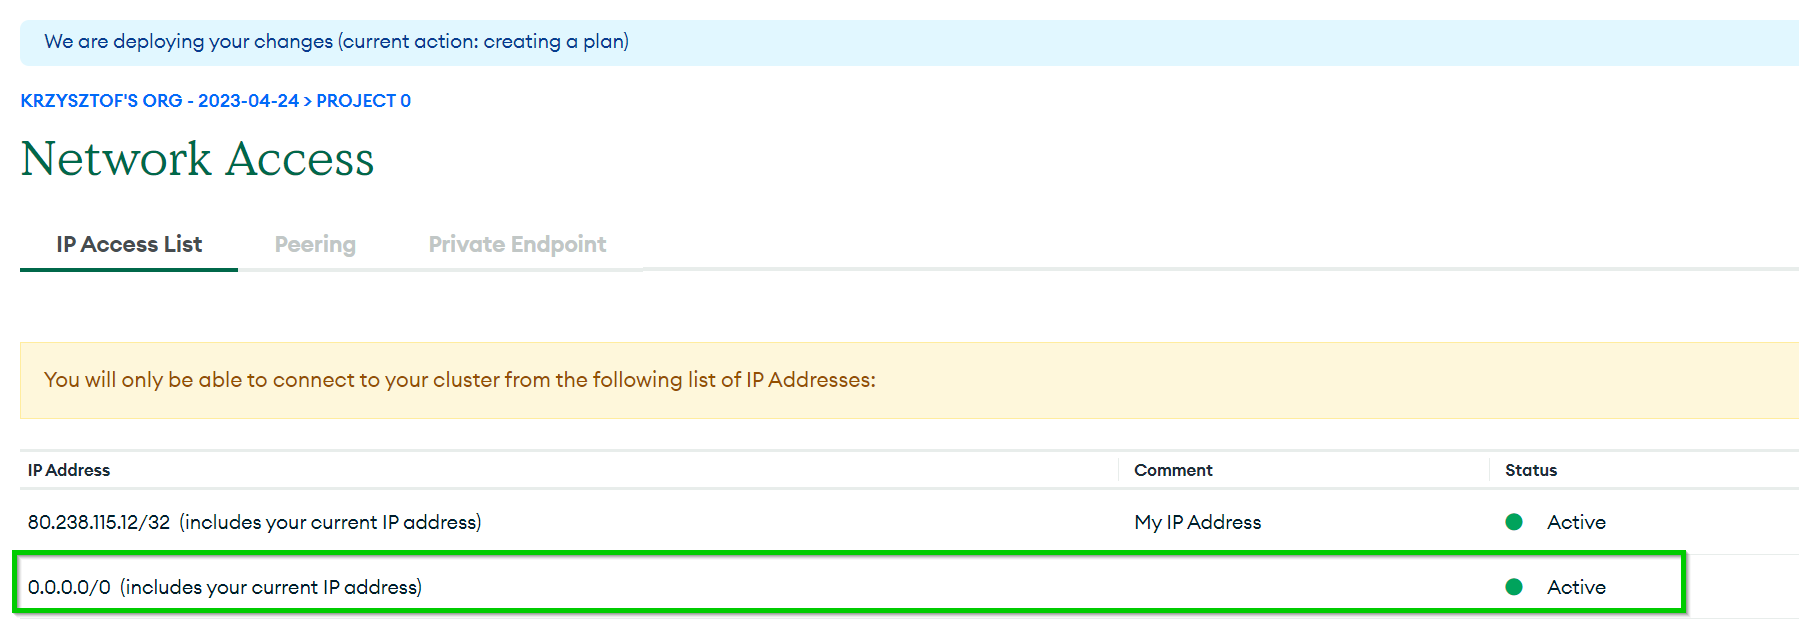

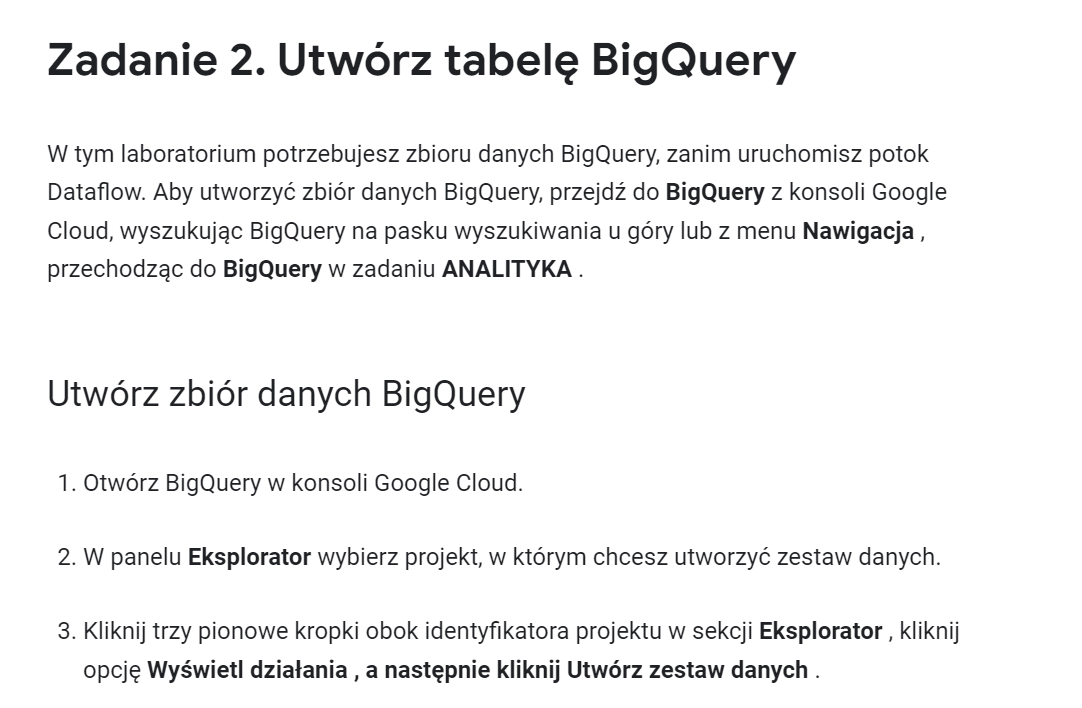

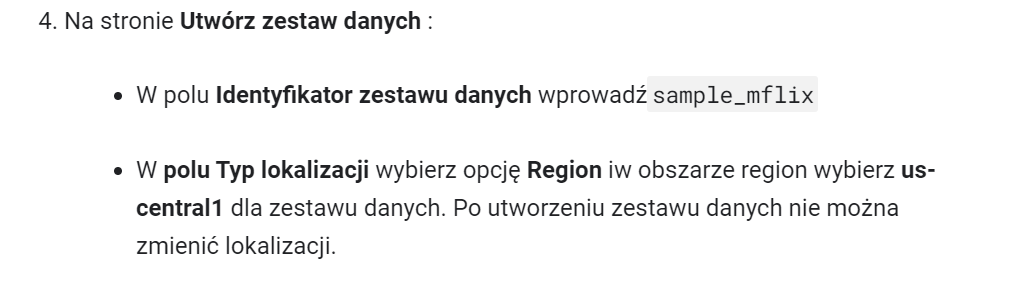

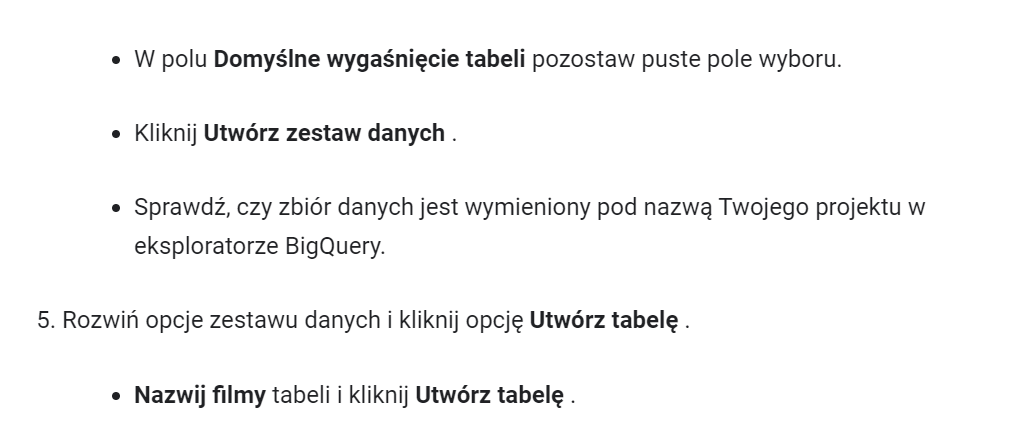

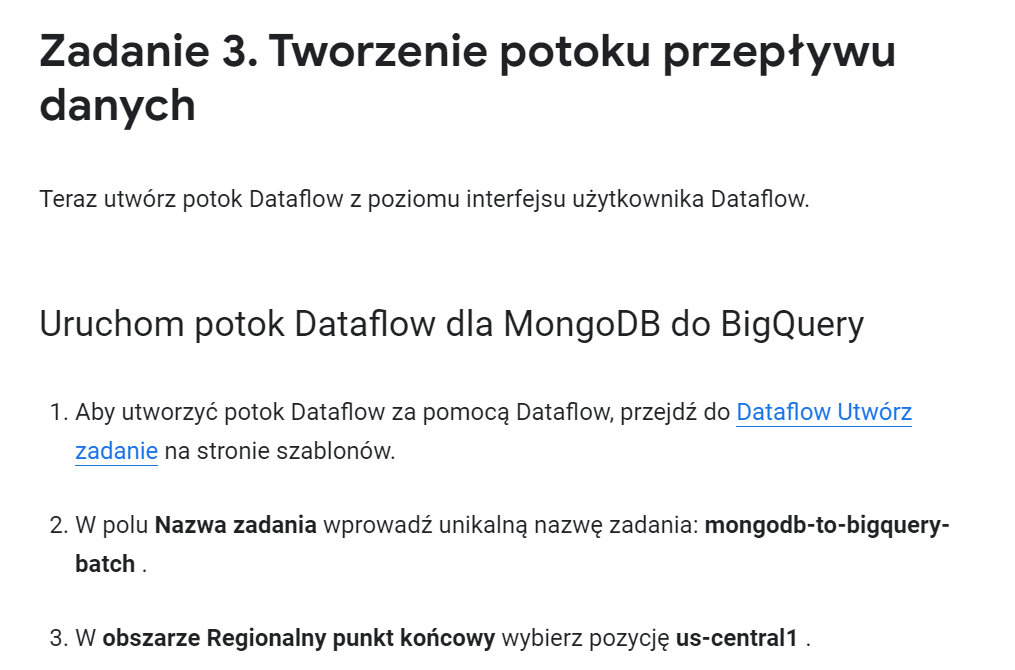

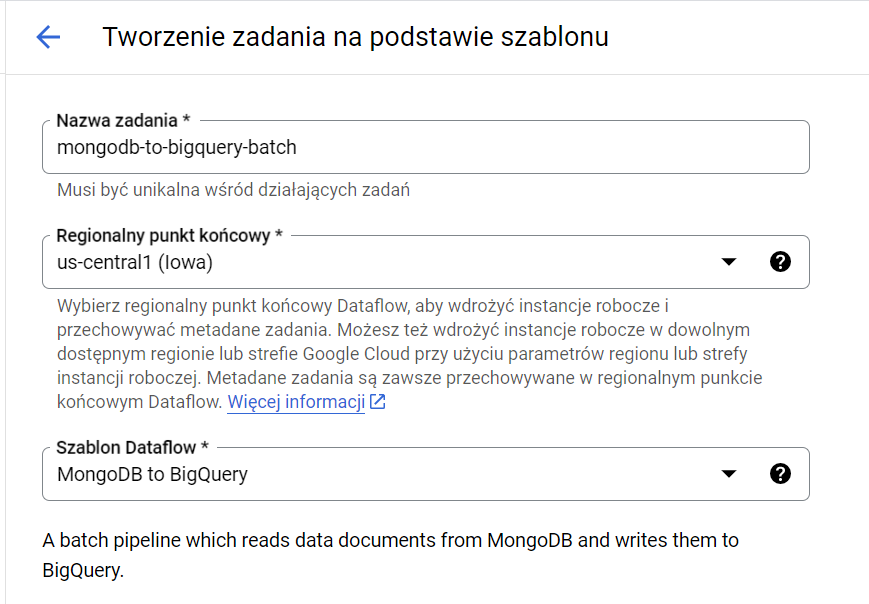

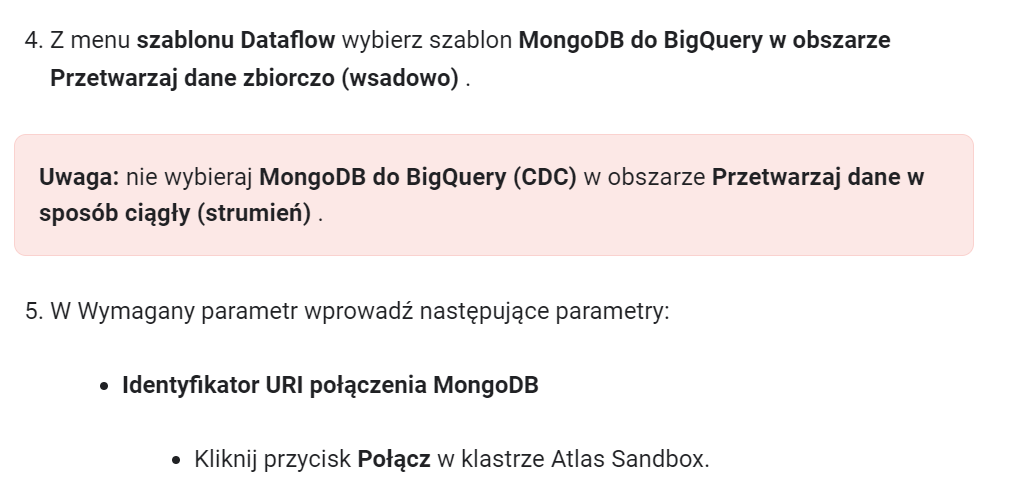

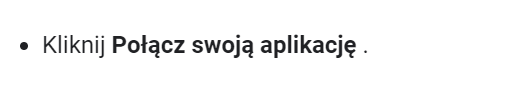

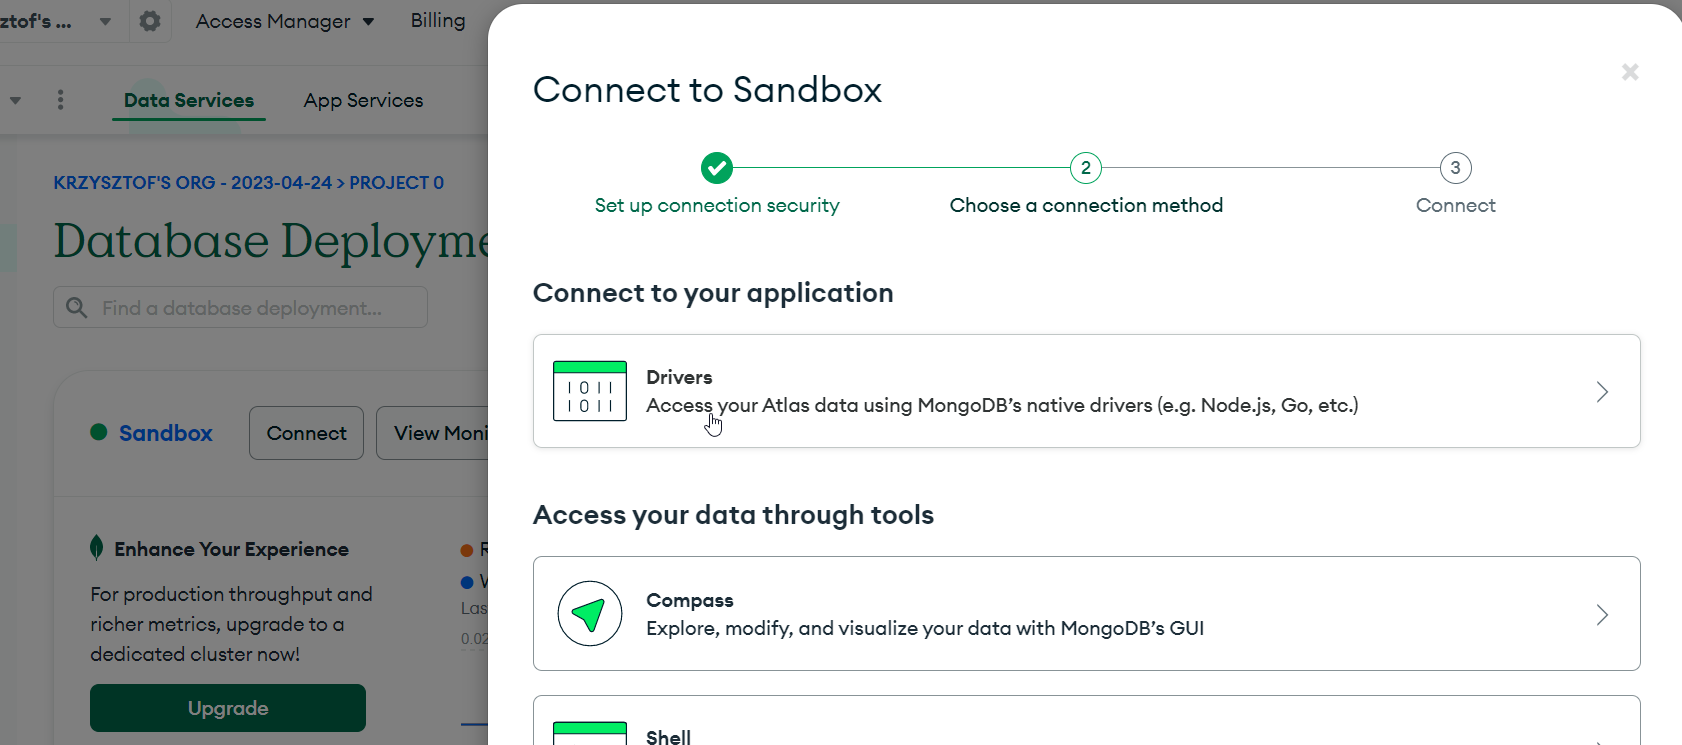

In [ ]:
mongodb+srv://sandbox.onxgp2d.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority

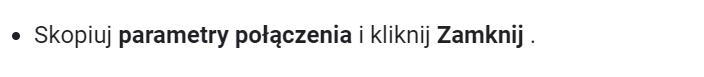

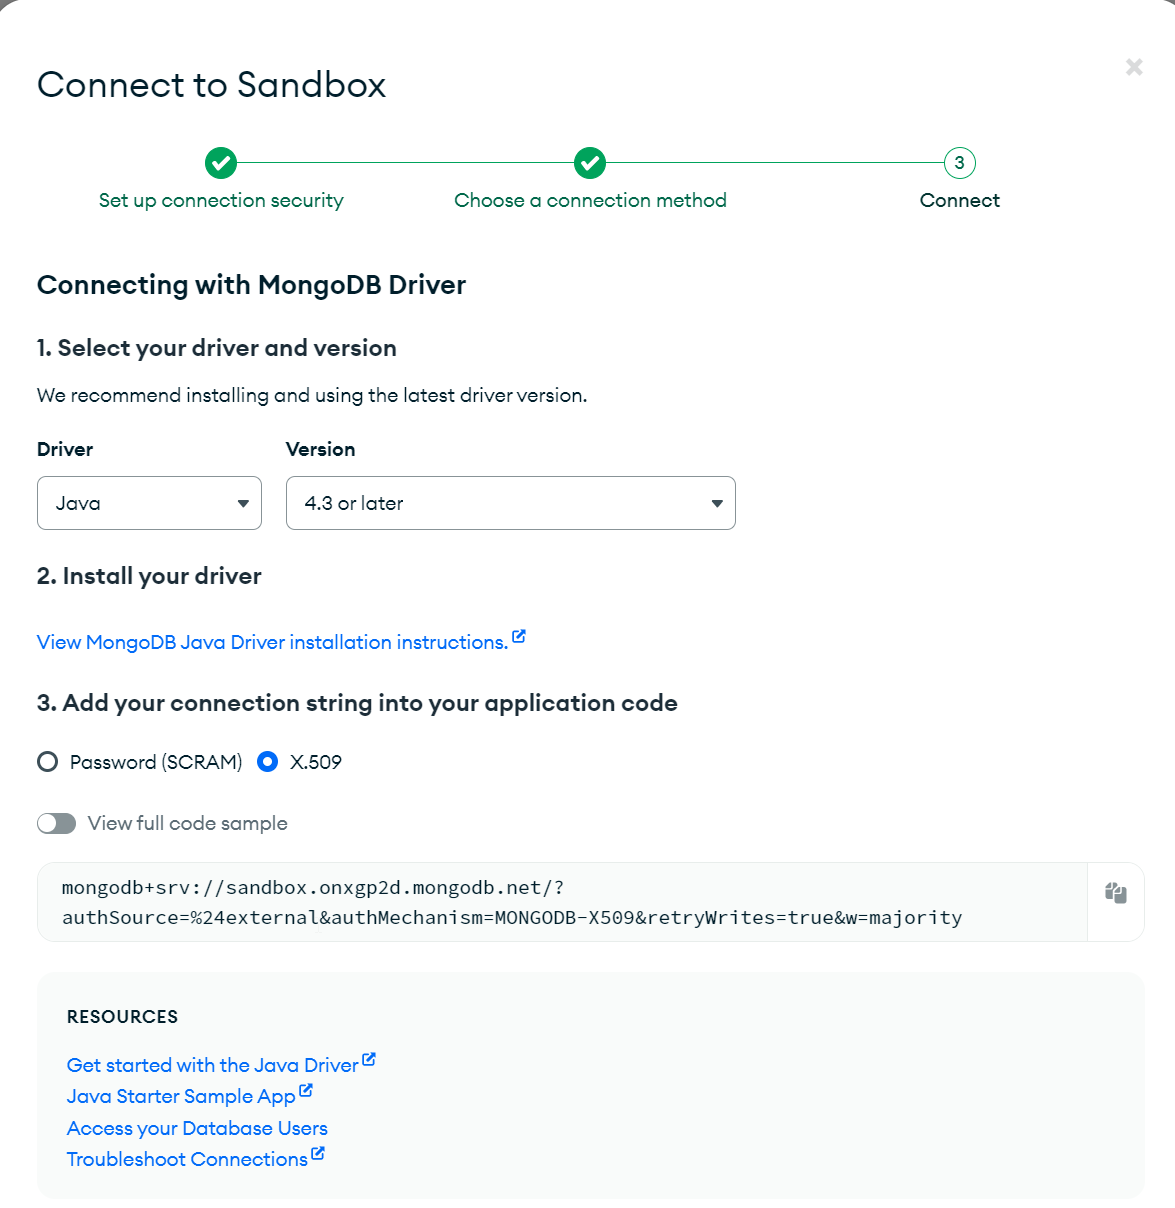

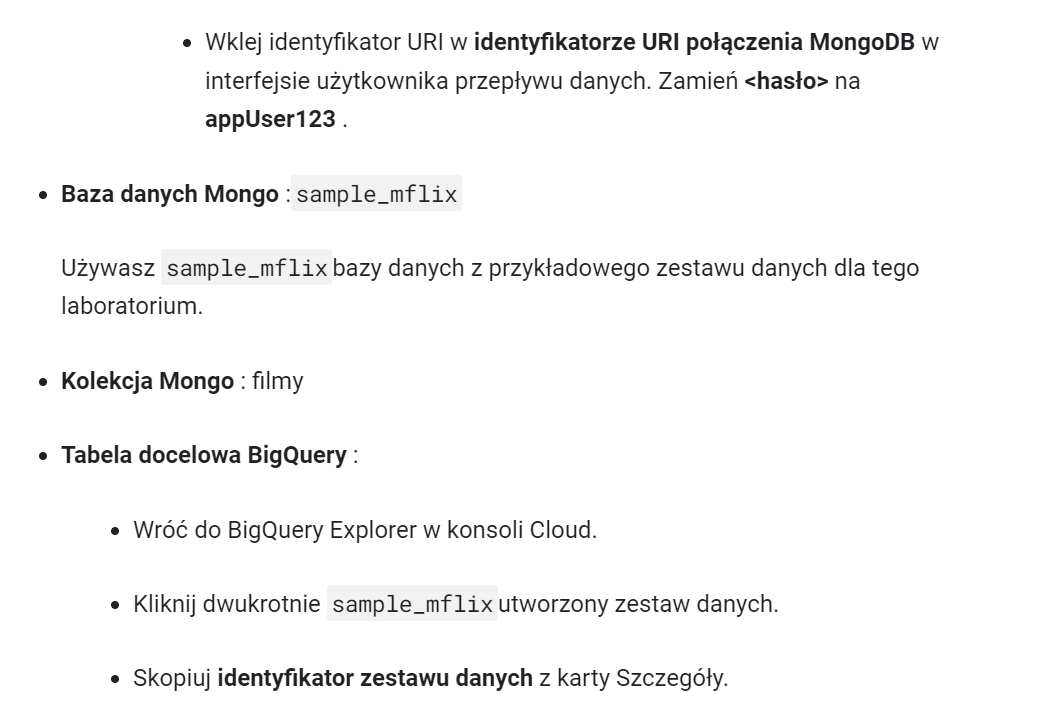

In [ ]:
qwiklabs-gcp-01-755452ab66e9.sample_mflix.movies

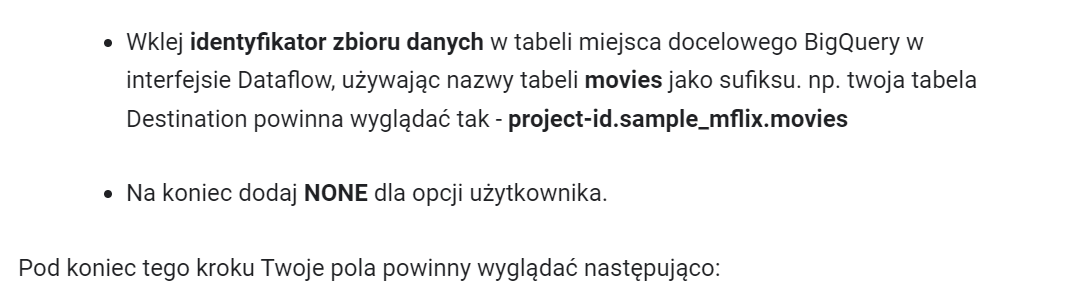

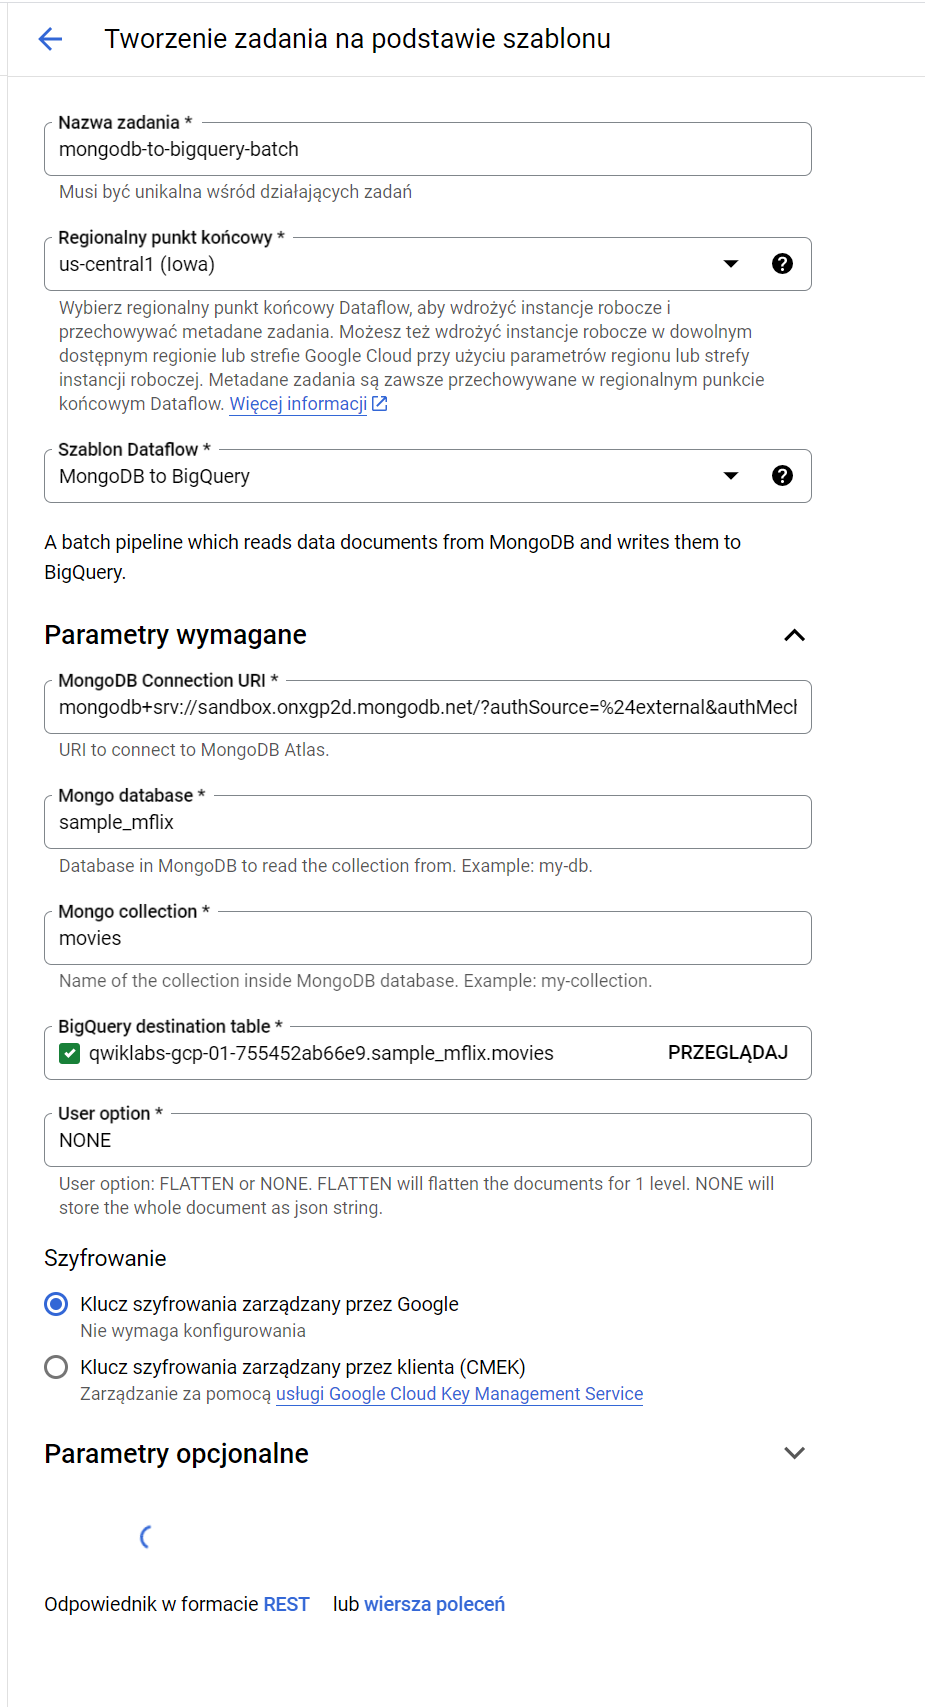

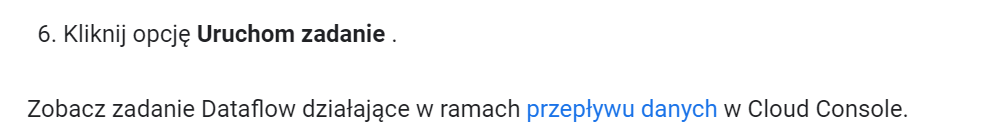

Error message from worker: org.apache.beam.sdk.util.UserCodeException: com.mongodb.MongoSecurityException: Exception authenticating

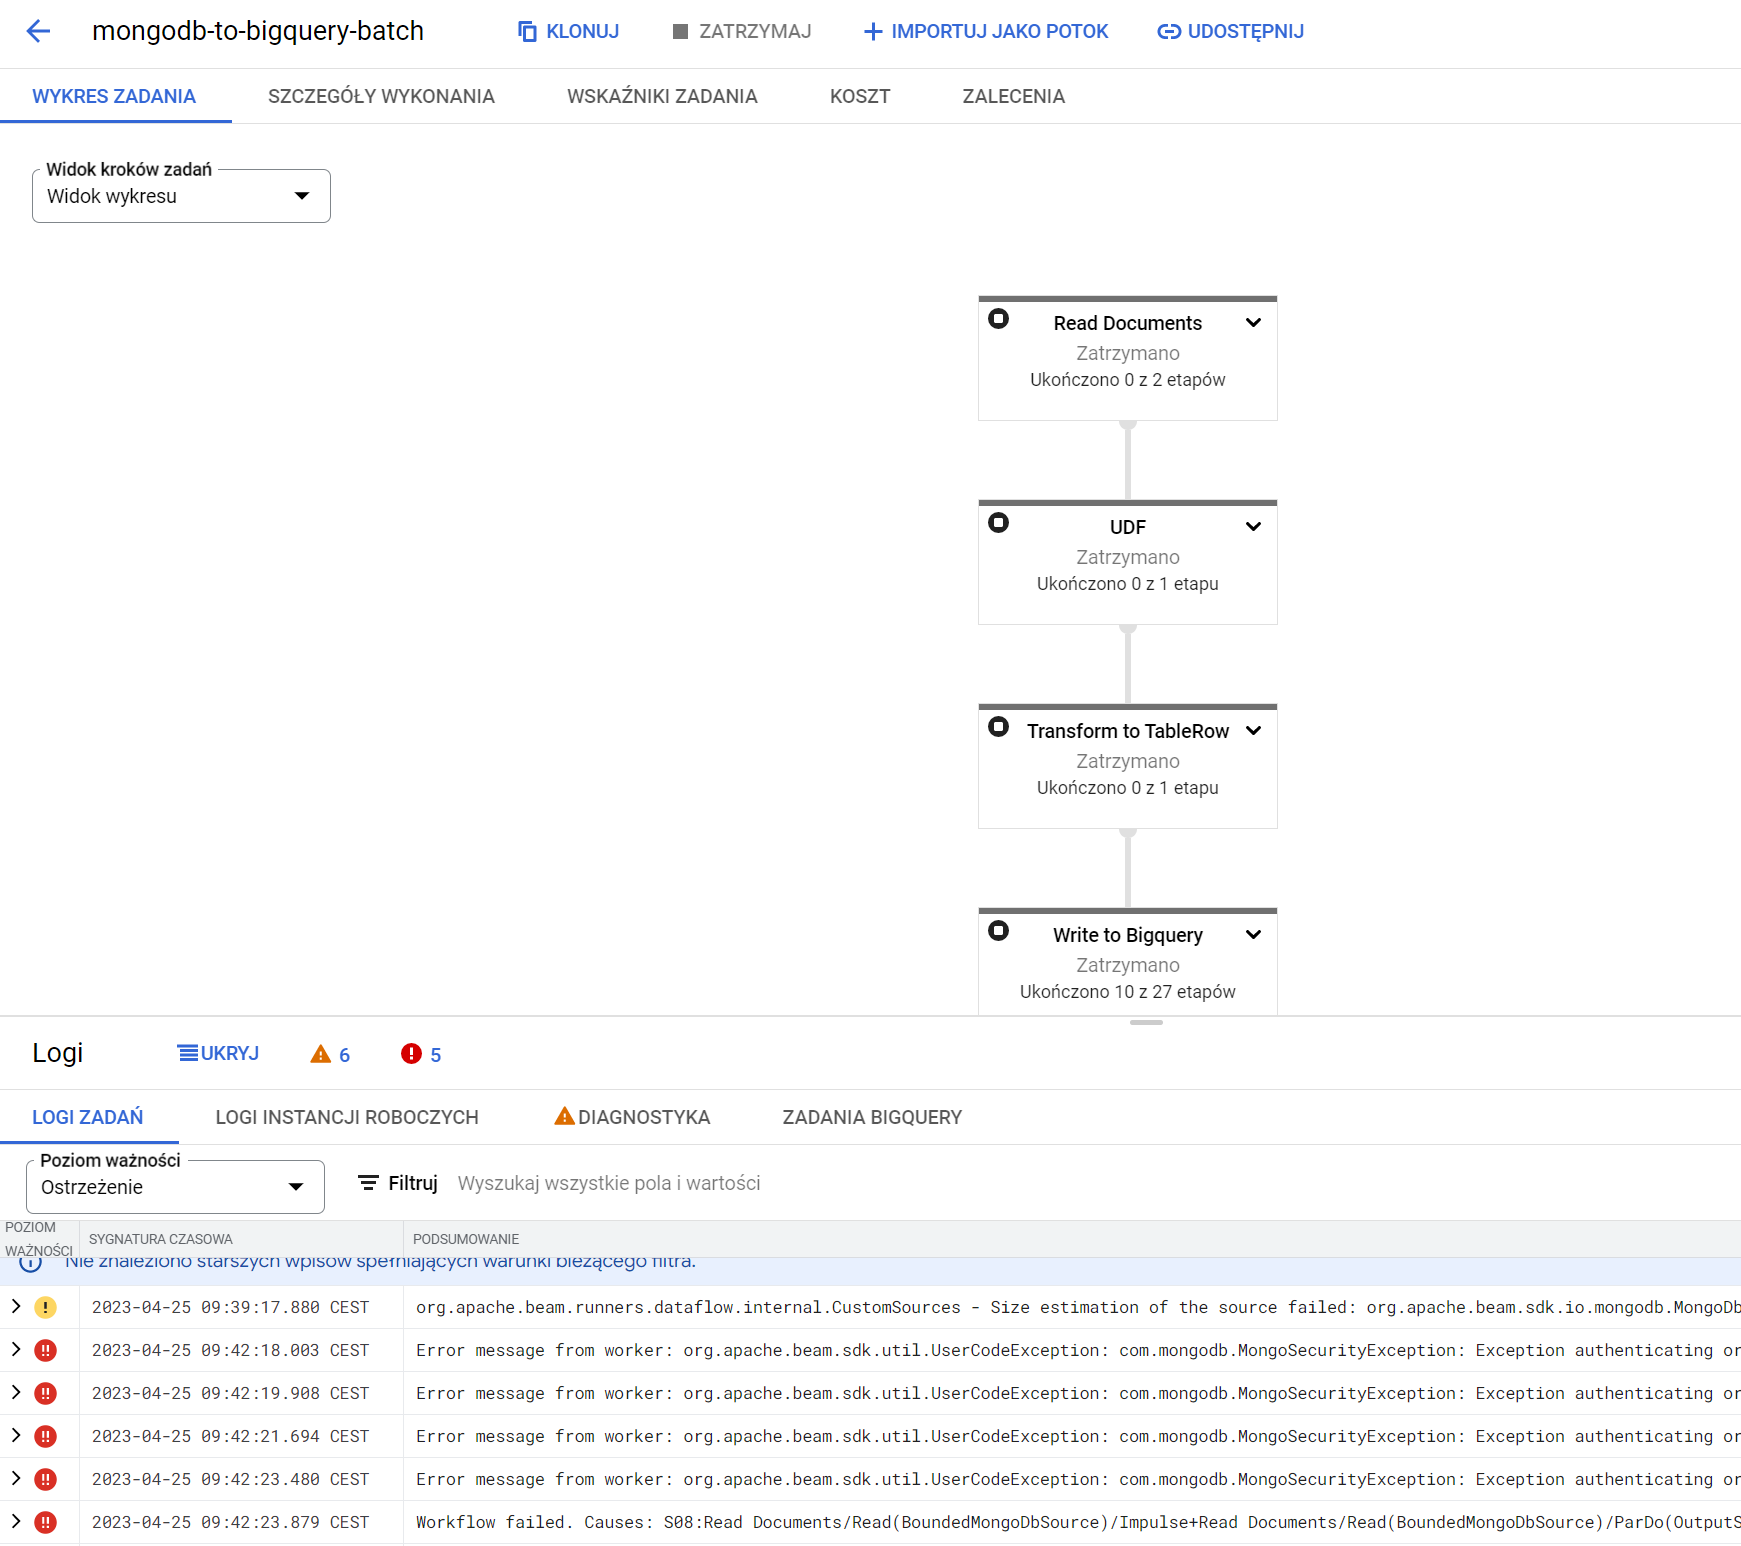

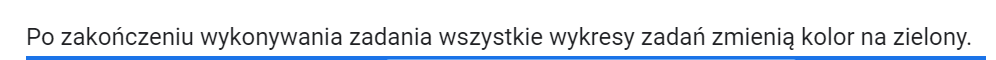

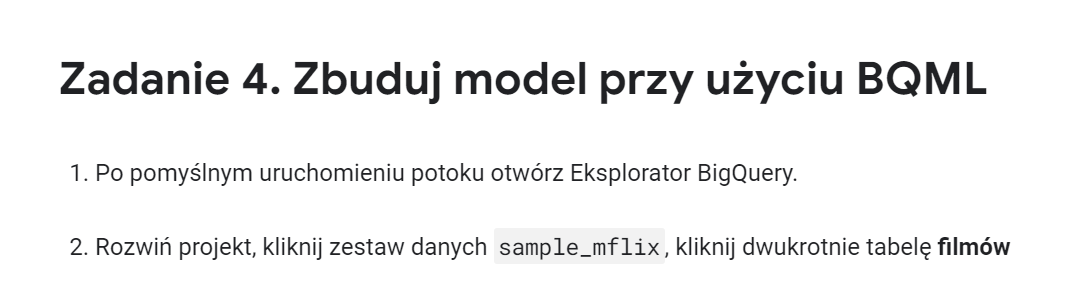

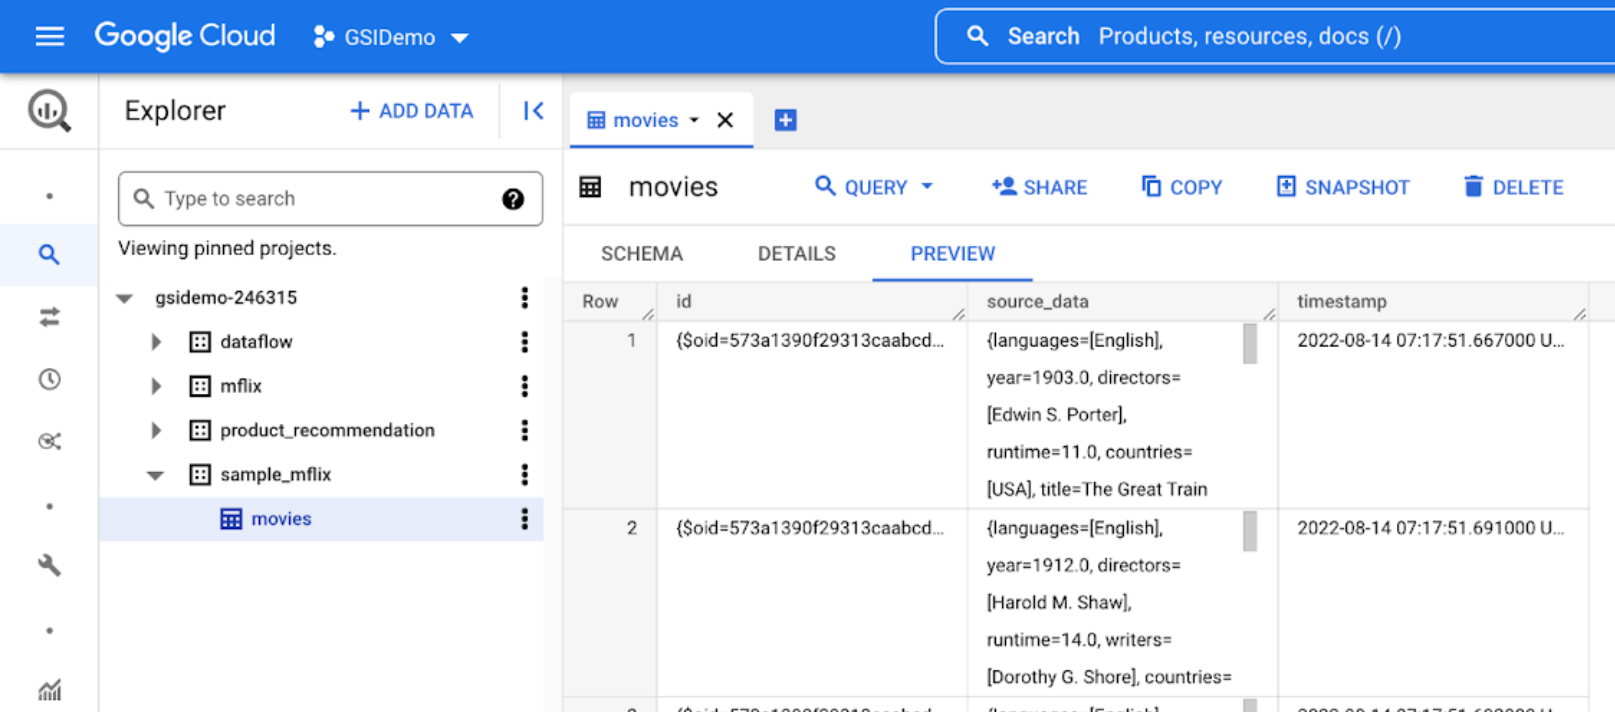

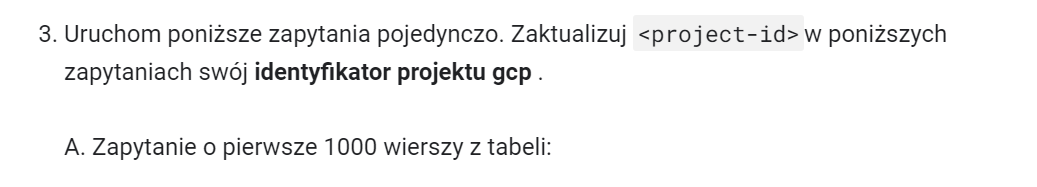

In [ ]:
%%bigquery

SELECT * FROM `<project-id>.sample_mflix.movies` LIMIT 1000;

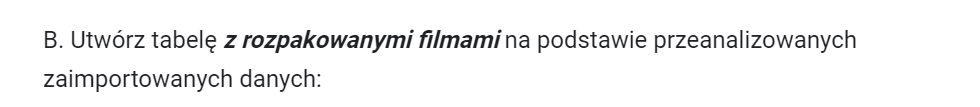

In [ ]:
%%bigquery

# Parse source_data and create movies-unpacked
CREATE OR REPLACE TABLE `<project-id>.sample_mflix.movies-unpacked` AS(

SELECT
timestamp,
JSON_EXTRACT(source_data, "$.year") as year,
JSON_EXTRACT(source_data, "$.cast") as movie_cast,
SAFE_CAST(JSON_EXTRACT(source_data, "$.imdb.rating")AS FLOAT64) as imdb_rating,
JSON_EXTRACT(source_data, "$.title") as title,
JSON_EXTRACT(source_data, "$.imdb.votes") as imdb_votes,
JSON_EXTRACT(source_data, "$.type") as type,
JSON_EXTRACT(source_data, "$.rated") as rated,
SAFE_CAST(JSON_EXTRACT(source_data, "$.tomatoes.viewer.rating") AS FLOAT64) as tomato_rating,
JSON_EXTRACT(source_data, "$.tomatoes.viewer.numReviews") as tomato_numReviews,
JSON_EXTRACT(source_data, "$.tomatoes.viewer.meter") as tomato_meter


from `<project-id>.sample_mflix.movies`);

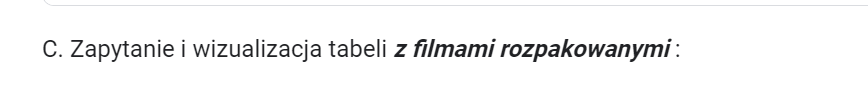

In [ ]:
%%bigquery

# Query newly created table
SELECT * FROM `<project-id>.sample_mflix.movies-unpacked` LIMIT 1000;

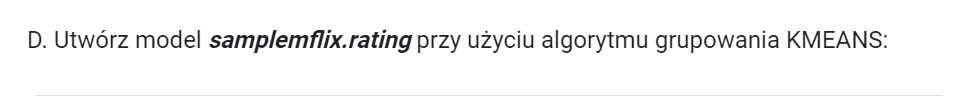

In [ ]:
%%bigquery

# Clustering base on imdb rating and tomato rating
CREATE or REPLACE MODEL
`sample_mflix.ratings`
OPTIONS(
  MODEL_TYPE='KMEANS',
  NUM_CLUSTERS=5,
  KMEANS_INIT_METHOD='KMEANS++',
  DISTANCE_TYPE = 'EUCLIDEAN'
) AS

SELECT
AVG(imdb_rating) as avg_imdb_rating,
AVG(tomato_rating) as avg_tomato_rating,
rated

FROM `<project-id>.sample_mflix.movies-unpacked`
group by rated;

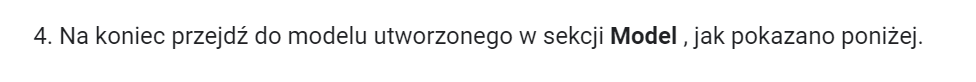